In [1]:
from datetime import datetime, timezone
import pytz

utc_dt = datetime.now(timezone.utc) # UTC time
dt = utc_dt.astimezone()
tz = pytz.timezone('Europe/Berlin')
berlin_now = datetime.now(tz)
print(berlin_now)

2023-08-02 10:37:41.426002+02:00


# 0. import libraries, general settings

In [2]:
# first mute future warnings and only then import pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import scipy
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

# 1. import OCM segmentation measurements at timepoint V0 for all sponge specimens

In [3]:
# Define the folder path where the measurement files are located
folder_path = '../data/imaging/OCM/segmentation_measurements_V0/'

# Initialize an empty list to store the dataframes
dataframes = []

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a CSV file
    if file_name.endswith('.txt'):
        # Create the full file path
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file into a dataframe
        df = pd.read_csv(file_path, sep='\t')
        
        # Append the dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dataframes)

Gemmule diameters were measured in ImageJ:

In [4]:
combined_df['gemmule_diameter_um'] = [444, 466, 420, 460, 527]

In [5]:
combined_df

Filename  Volume_incurrent_canal_um3  \
0  iso_Denoised_NOC12_45uM_afterV20_V0                    98098668   
0                   iso_overnight_2_V0                    94584267   
0          iso_Denoised_4_14hours_V136                   107367498   
0           iso_3_mech_T120_Volumes_V0                   154515222   
0          iso_4_mech_T120_Volumes_V15                   202605516   

   Volume_excurrent_canal_um3  Surface_incurrent_canal_um2  \
0                    51118047                 1.037610e+07   
0                    60133698                 1.043913e+07   
0                    48845673                 9.070323e+06   
0                   107235630                 8.184808e+06   
0                   117311382                 1.460993e+07   

   Surface_excurrent_canal_um2  surface_tent_um2  total_volume_um3  \
0                  2107983.213       5214502.175         404239437   
0                  4107544.318       6512151.783         436151304   
0                  3399431.119       4516865.704         402972111   
0                  5350578.354       5314715.166         490693464   
0                  4766861.512       6117043.873         604983843   

   sphericity  gemmule_diameter_um  
0       0.024                  444  
0       0.014                  466  
0       0.041                  420  
0       0.036                  460  
0       0.035                  527

## 1.1 Measurements of several morphometrics

In [6]:
# Calculate mean and standard deviation of excurrent canal system volume
mean = np.mean(combined_df['Volume_excurrent_canal_um3']/1000000000)
sd = np.std(combined_df['Volume_excurrent_canal_um3']/1000000000)
print(mean, sd)

0.076928886 0.029278624685303054


In [7]:
# Calculate mean and standard deviation of incurrent canal system volume
mean = np.mean(combined_df['Volume_incurrent_canal_um3']/1000000000)
sd = np.std(combined_df['Volume_incurrent_canal_um3']/1000000000)
print(mean, sd)

0.1314342342 0.04158478375250931


In [8]:
# Calculate mean and standard deviation of total volume
mean = np.mean(combined_df['total_volume_um3']/1000000000)
sd = np.std(combined_df['total_volume_um3']/1000000000)
print(mean, sd)

0.4678080318 0.07561449262038672


In [9]:
# Calculate mean and standard deviation of tent surface area
mean = np.mean(combined_df['surface_tent_um2']/1000000)
sd = np.std(combined_df['surface_tent_um2']/1000000)
print(mean, sd)

5.5350557402 0.7044774475018521


In [10]:
# Calculate mean and standard deviation of excurrent surface area
mean = np.mean(combined_df['Surface_excurrent_canal_um2']/1000000)
sd = np.std(combined_df['Surface_excurrent_canal_um2']/1000000)
print(mean, sd)

3.946479703199999 1.126924366715172


In [11]:
# Calculate mean and standard deviation of incurrent surface area
mean = np.mean(combined_df['Surface_incurrent_canal_um2']/1000000)
sd = np.std(combined_df['Surface_incurrent_canal_um2']/1000000)
print(mean, sd)

10.5360574762 2.2049108011584932


### Total canal volume percentage

In [12]:
combined_df['Volume_canal_system_um3'] = combined_df['Volume_incurrent_canal_um3'] + combined_df['Volume_excurrent_canal_um3']

I'll assume the gemmule to be a perfect sphere and substract this from the total volume

In [13]:
combined_df['total_volume_nogemmule_um3'] = combined_df['total_volume_um3']-((4/3)*np.pi*((combined_df['gemmule_diameter_um']/2)**3))

In [14]:
combined_df['Percentage_canal_volume'] = combined_df['Volume_canal_system_um3']/combined_df['total_volume_nogemmule_um3']

In [15]:
# Calculate mean and standard deviation of percentage canal volume
mean = np.mean(combined_df['Percentage_canal_volume'])
sd = np.std(combined_df['Percentage_canal_volume'])
print(mean, sd)

0.4899646539592945 0.09056186487590823


## 1.2. Correlation analysis of morphometrics between sponge specimens

In [12]:
combined_df_selection = combined_df[['Volume_incurrent_canal_um3', 'Volume_excurrent_canal_um3', 'Surface_excurrent_canal_um2', 'Surface_incurrent_canal_um2', 'surface_tent_um2', 'total_volume_um3', 'gemmule_diameter_um']]

In [13]:
combined_df_corr = combined_df_selection.corr()

custom_labels = ['Surface incurrent canal', 'Surface tent', 'Surface excurrent canal', 'Gemmule diameter', 'Volume total', 'Volume incurrent canals', 'Volume excurrent canal']

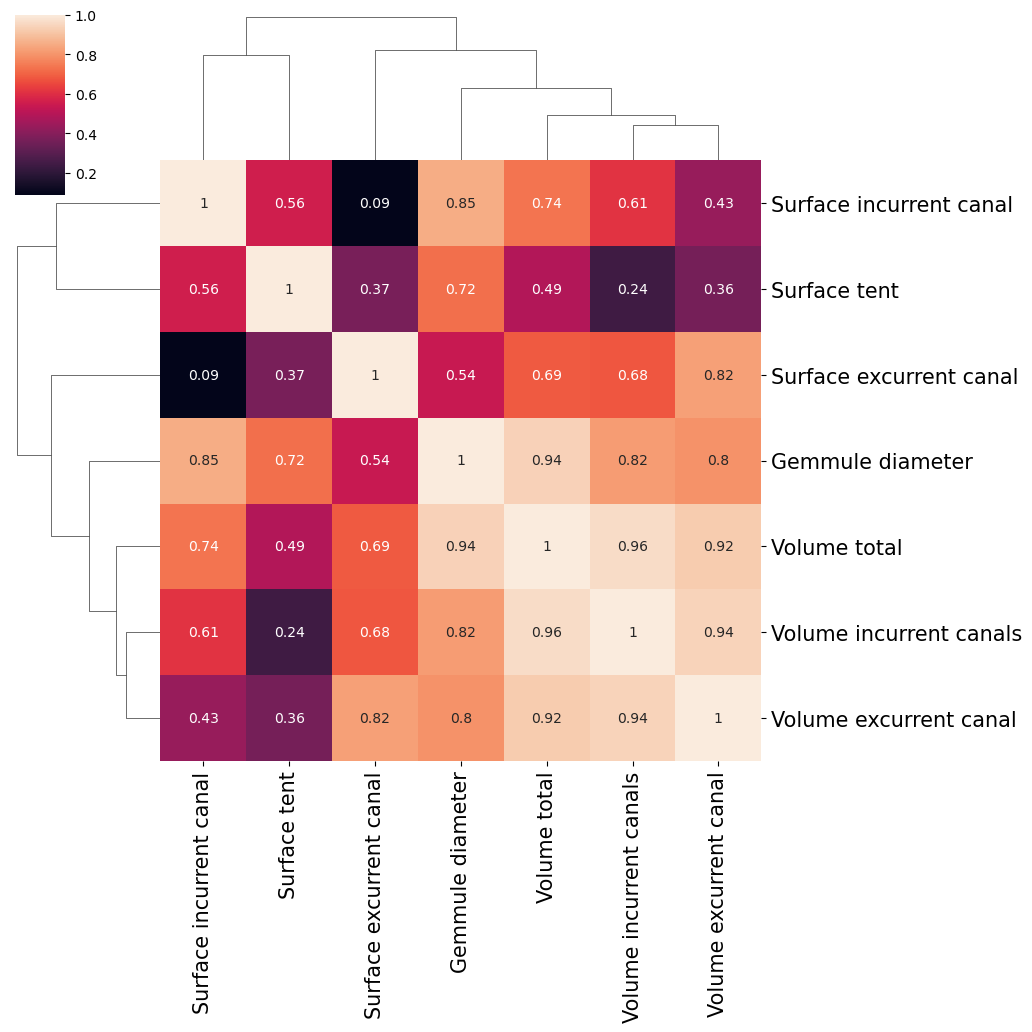

In [14]:
cluster_map = sns.clustermap(combined_df_corr, annot = True)

# Modify x-axis tick labels
plt.setp(cluster_map.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)  # Rotate labels if needed
cluster_map.ax_heatmap.set_xticklabels(custom_labels, fontsize = 15)

# Modify y-axis tick labels
cluster_map.ax_heatmap.set_yticklabels(custom_labels, fontsize = 15)

plt.savefig('../paper/figures/suppl_figs/suppl-fig_OCM/correlation.svg')

# 2. import OCM segmentation measurements for time series

In [16]:
#define function for calculating realtive changes and add timing

def rel_changes(dataframe, time_min, frame_start):
    for column in dataframe.columns[1:]:
        dataframe[f'{column}_relative'] = ((dataframe[column] - dataframe[column][frame_start])/dataframe[column][frame_start])*100
    #add timing
    dataframe['time'] = dataframe.index * time_min
    dataframe = pd.melt(dataframe, id_vars=['Filename', 'time'])
    return(dataframe)

In [17]:
#define plotting function

def plotting(dataframe, variables, colors, title, change):
    dataframe_hues = dataframe[dataframe['variable'].isin(variables)]
    fig, ax = plt.subplots(figsize=(10, 5))
    for variable, color in zip(variables, colors):
        subset = dataframe_hues[dataframe_hues['variable'] == variable]
        sns.lineplot(data=subset, x='time', y='value', color=color, label=variable, linewidth=3)
    ax.set_xlabel("Time [min]", fontsize=18)
    ax.set_ylabel(f"Relative {change} changes", fontsize=18)
    ax.set_ylim(-130, 130)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title(title, fontsize=20)
    plt.grid()
    plt.savefig(f'../paper/figures/fig1/{title}.png', bbox_inches='tight')
    plt.savefig(f'../paper/figures/fig1/{title}.svg', bbox_inches='tight')

In [24]:
#define plotting function for NOC12 with vertical line at compound addition

def plotting_noc12(dataframe, variables, colors, title, change):
    dataframe_hues = dataframe[dataframe['variable'].isin(variables)]
    fig, ax = plt.subplots(figsize=(10, 5))
    for variable, color in zip(variables, colors):
        subset = dataframe_hues[dataframe_hues['variable'] == variable]
        sns.lineplot(data=subset, x='time', y='value', color=color, label=variable, linewidth=3)
    ax.set_xlabel("Time [min]", fontsize=18)
    ax.set_ylabel(f"Relative {change} changes", fontsize=18)
    ax.set_ylim(-130, 130)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title(title, fontsize=20)
    plt.grid()
    plt.axvline(x=5, color='black', linestyle='--')
    plt.savefig(f'../paper/figures/fig1/{title}.png', bbox_inches='tight')
    plt.savefig(f'../paper/figures/fig1/{title}.svg', bbox_inches='tight')

## 2.1 import OCM segmentation measurements for NOC-12 treatment and plots

In [25]:
import os
import pandas as pd

# Create an empty list to store individual data frames
dfs = []

# Folder path containing the .txt files
folder_path = '../../../../Sponge_OCM_shared/paper_crop/4_segmentation/4-4_Measurements/220412_NOC/220412_NOC_corr/'

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        
        # Read the file as a data frame
        df = pd.read_csv(file_path, sep='\t')  # Adjust delimiter if necessary
        
        # Append the data frame to the list
        dfs.append(df)

# Concatenate all data frames in the list
NOC12_timeseries = pd.concat(dfs, ignore_index=True)

#calculate realtive changes, add time and make long from wide dataframe
NOC12_timeseries = rel_changes(NOC12_timeseries, 15/60, 5)

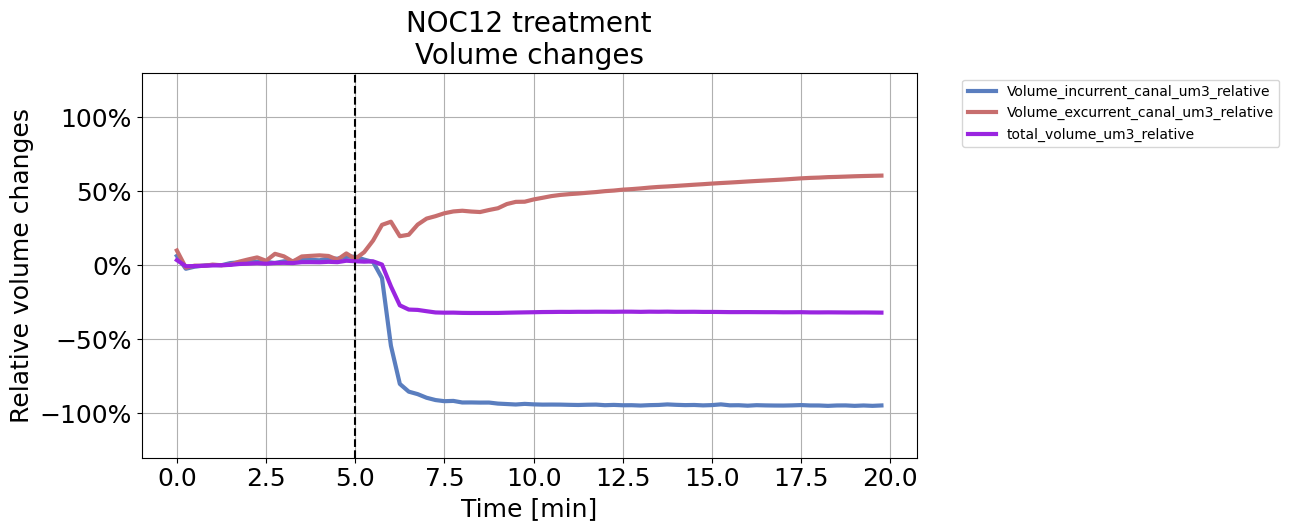

In [26]:
plotting_noc12(NOC12_timeseries, ['Volume_incurrent_canal_um3_relative', 'Volume_excurrent_canal_um3_relative', 'total_volume_um3_relative'], ['#5A7EBF', '#C76E6E', '#9A25E0'], 'NOC12 treatment\nVolume changes', 'volume')

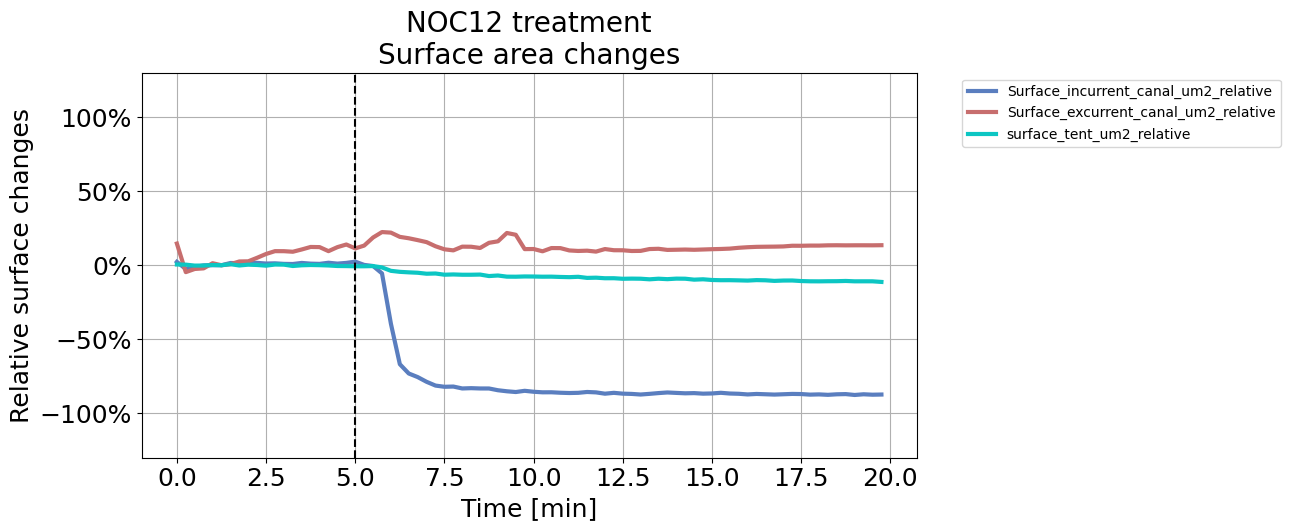

In [28]:
plotting_noc12(NOC12_timeseries, ['Surface_incurrent_canal_um2_relative', 'Surface_excurrent_canal_um2_relative', 'surface_tent_um2_relative'], ['#5A7EBF', '#C76E6E', '#0CC6C3'], 'NOC12 treatment\nSurface area changes', 'surface')

## 2.1 import OCM segmentation measurements for overnight_series

In [24]:
import os
import pandas as pd

# Create an empty list to store individual data frames
dfs = []

# Folder path containing the .txt files
folder_path = '../../../../Sponge_OCM_shared/paper_crop/4_segmentation/4-4_Measurements/220412_overnight_updatedmodel/220412_overnight_corr/measurements_choanocyte_chamber_corrections/'

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        
        # Read the file as a data frame
        df = pd.read_csv(file_path, sep='\t')  # Adjust delimiter if necessary
        
        # Append the data frame to the list
        dfs.append(df)

# Concatenate all data frames in the list
overnight_timeseries = pd.concat(dfs, ignore_index=True)

#calculate realtive changes, add time and make long from wide dataframe
overnight_timeseries_rel = rel_changes(overnight_timeseries, 180.24/60, 10)

In [27]:
overnight_timeseries_rel['variable'].unique()

array(['Volume_incurrent_canal [um3]', 'Volume_excurrent_canal [um3]',
       'Volume_excurrent_without_choanocyte_chambers [um3]',
       'Volume_tissue [um3]', 'Surface_incurrent_canal [um2]',
       'Surface_excurrent_canal [um2]',
       'Surface_excurrent_without_choanocyte_chambers [um2]',
       'Tent surface area [um2]', 'Total volume [um3]', 'Sphericity',
       'Volume_incurrent_canal [um3]_relative',
       'Volume_excurrent_canal [um3]_relative',
       'Volume_excurrent_without_choanocyte_chambers [um3]_relative',
       'Volume_tissue [um3]_relative',
       'Surface_incurrent_canal [um2]_relative',
       'Surface_excurrent_canal [um2]_relative',
       'Surface_excurrent_without_choanocyte_chambers [um2]_relative',
       'Tent surface area [um2]_relative', 'Total volume [um3]_relative',
       'Sphericity_relative'], dtype=object)

### Some relative changes

In [55]:
#Minimum relative incurrent volume
overnight_timeseries_rel_incurrent = overnight_timeseries_rel[overnight_timeseries_rel['variable'] == 'Volume_incurrent_canal [um3]_relative']
overnight_timeseries_rel_incurrent['value'].min()

-96.12384387045118

In [28]:
#Maximum relative excurrent volume
overnight_timeseries_rel_excurrent_vol = overnight_timeseries_rel[overnight_timeseries_rel['variable'] == 'Volume_excurrent_without_choanocyte_chambers [um3]_relative']
overnight_timeseries_rel_excurrent_vol['value'].max()

108.26290938929584

In [29]:
#Maximum relative excurrent surface area
overnight_timeseries_rel_excurrent_sur = overnight_timeseries_rel[overnight_timeseries_rel['variable'] == 'Surface_excurrent_without_choanocyte_chambers [um2]_relative']
overnight_timeseries_rel_excurrent_sur['value'].max()

36.51786590702404

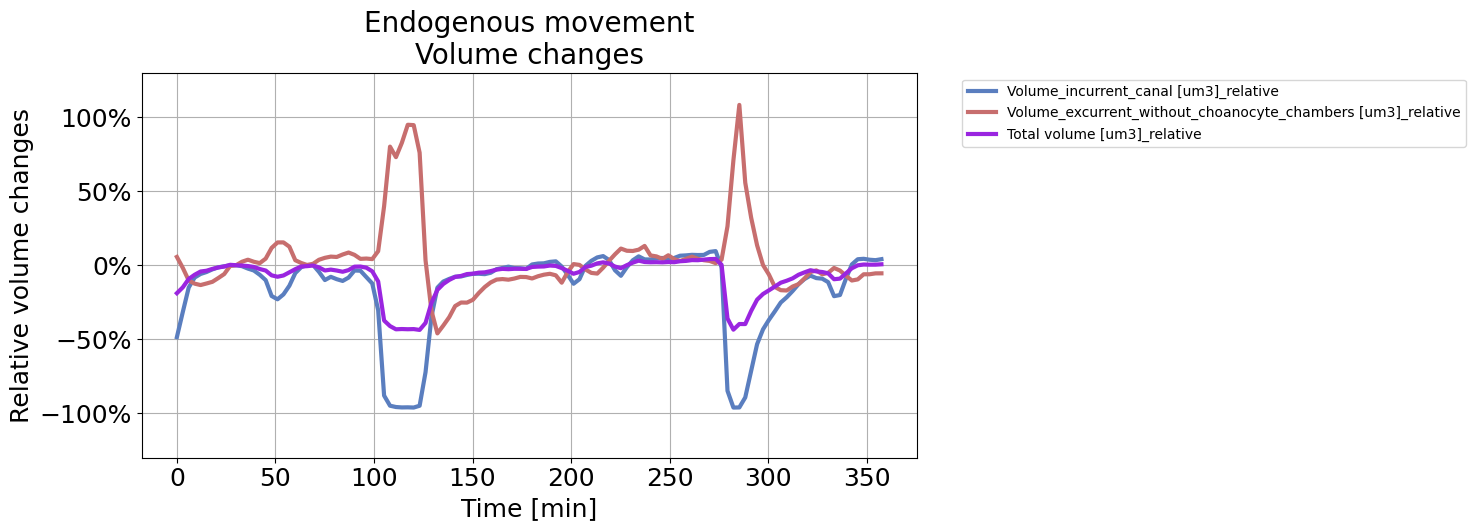

In [22]:
plotting(overnight_timeseries_rel, ['Volume_incurrent_canal [um3]_relative', 'Volume_excurrent_without_choanocyte_chambers [um3]_relative', 'Total volume [um3]_relative'], ['#5A7EBF', '#C76E6E', '#9A25E0'], 'Endogenous movement\nVolume changes', 'volume')

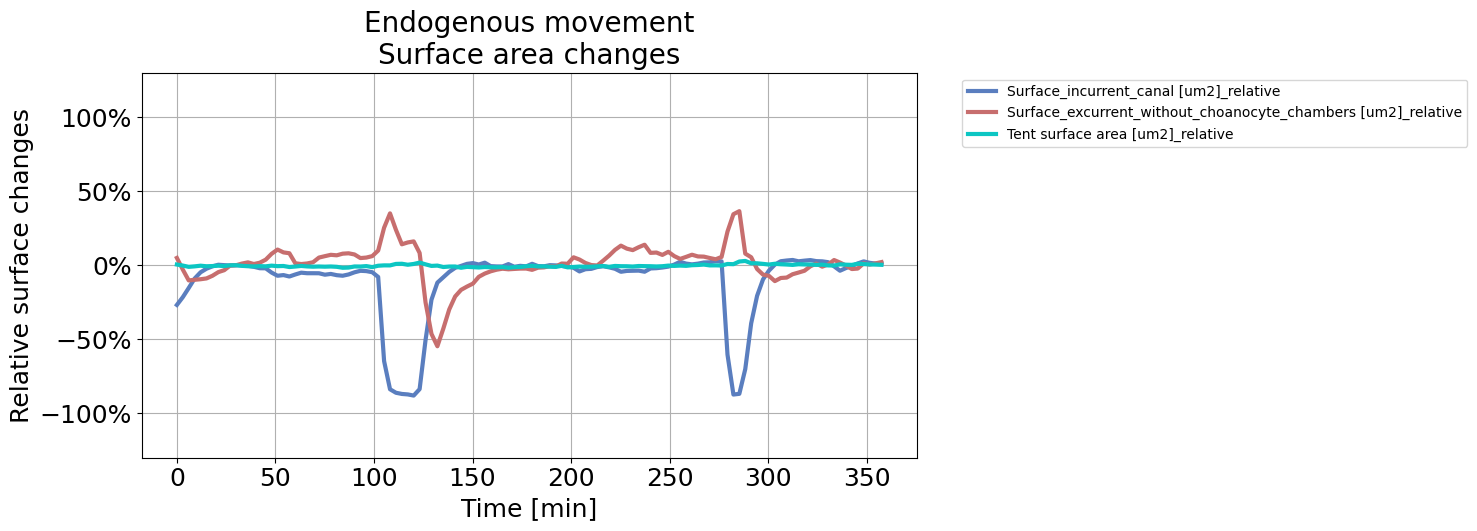

In [13]:
plotting(overnight_timeseries_rel, ['Surface_incurrent_canal [um2]_relative', 'Surface_excurrent_without_choanocyte_chambers [um2]_relative', 'Tent surface area [um2]_relative'], ['#5A7EBF', '#C76E6E', '#0CC6C3'], 'Endogenous movement\nSurface area changes', 'surface')

## 2.1 import OCM segmentation measurements for mechanical treatment 2

In [23]:
import os
import pandas as pd

# Create an empty list to store individual data frames
dfs = []

# Folder path containing the .txt files
folder_path = '../../../../Sponge_OCM_shared/paper_crop/4_segmentation/4-4_Measurements/230215_16_mech/2_mech_corr/corrections_bottom_measurements/'

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        
        # Read the file as a data frame
        df = pd.read_csv(file_path, sep='\t')  # Adjust delimiter if necessary
        
        # Append the data frame to the list
        dfs.append(df)

# Concatenate all data frames in the list
mech2_timeseries = pd.concat(dfs, ignore_index=True)

#calculate realtive changes, add time and make long from wide dataframe
mech2_timeseries_rel = rel_changes(mech2_timeseries, 30.24/60, 3)

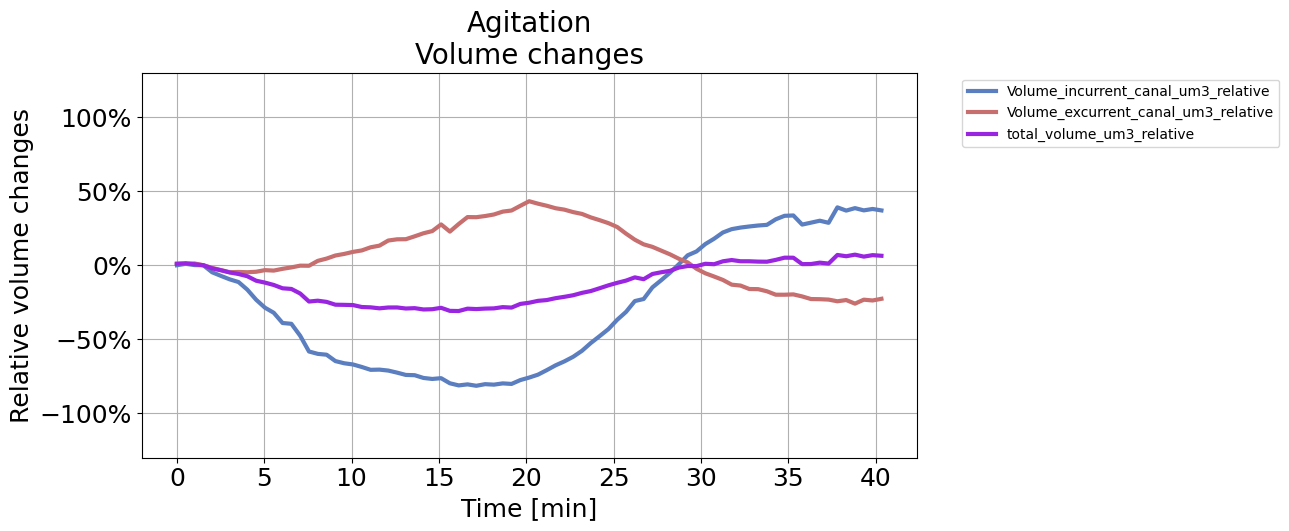

In [24]:
plotting(mech2_timeseries_rel, ['Volume_incurrent_canal_um3_relative', 'Volume_excurrent_canal_um3_relative', 'total_volume_um3_relative'], ['#5A7EBF', '#C76E6E', '#9A25E0'], 'Agitation\nVolume changes', 'volume')

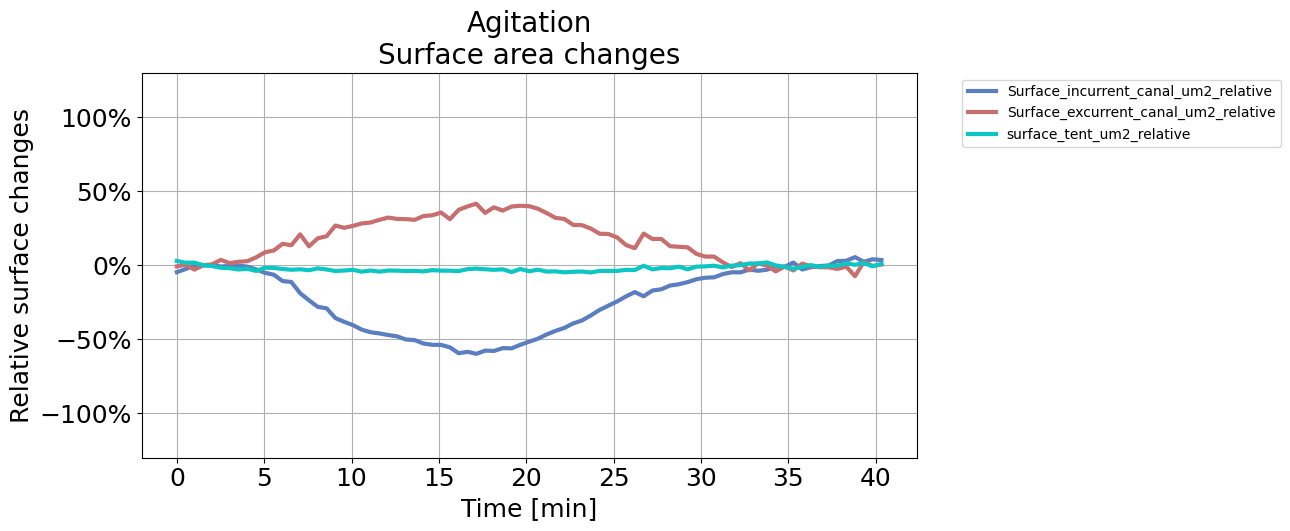

In [25]:
plotting(mech2_timeseries_rel, ['Surface_incurrent_canal_um2_relative', 'Surface_excurrent_canal_um2_relative', 'surface_tent_um2_relative'], ['#5A7EBF', '#C76E6E', '#0CC6C3'], 'Agitation\nSurface area changes', 'surface')

# 3. Histograms

The segmentation process produced thickness maps for the inner canal system of the sponge (including choanocyte chambers). Each voxel of the canal system is part of a thickness area. We can therefore plot the distribution of voxels across all inner diameters for the label "excurrent system" and compare default with collapsed state.

In [11]:
default = pd.read_csv('../../../../Sponge_OCM_shared/paper_crop/4_segmentation/4-4_Measurements/220412_overnight_updatedmodel/220412_overnight_histograms_perLabel/iso_overnight_2_V10_thicknessmap_label2_histogram.txt', sep='\t')

collapse = pd.read_csv('../../../../Sponge_OCM_shared/paper_crop/4_segmentation/4-4_Measurements/220412_overnight_updatedmodel/220412_overnight_histograms_perLabel/iso_overnight_2_V39_thicknessmap_label2_histogram.txt', sep='\t')

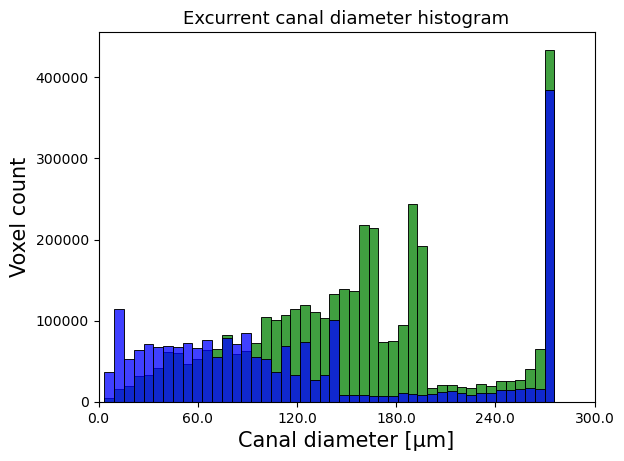

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming you have 'default' and 'collapse' datasets defined

fig, ax = plt.subplots()

# Histogram for 'collapse' data
sns.histplot(data=collapse, x='Bin Middle', weights='Count', bins=50, kde=False, color='green', ax=ax)

# Histogram for 'default' data
sns.histplot(data=default, x='Bin Middle', weights='Count', bins=50, kde=False, color='blue', ax=ax)

ax.set_xlim([0, 100])
ax.set_xlabel('Canal diameter [µm]', fontsize=15)
ax.set_ylabel('Voxel count', fontsize=15)
ax.set_title('Excurrent canal diameter histogram', fontsize=13)

# Define a custom formatter function to multiply the x-axis labels by 3
def multiply_labels(x, pos):
    return "{:.1f}".format(x * 3)

# Apply the custom formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(multiply_labels))

plt.show()
fig.savefig('../paper/figures/suppl_figs/OCM_histplot.svg', bbox_inches='tight')
fig.savefig('../paper/figures/suppl_figs/OCM_histplot.png', bbox_inches='tight')